# Part 1

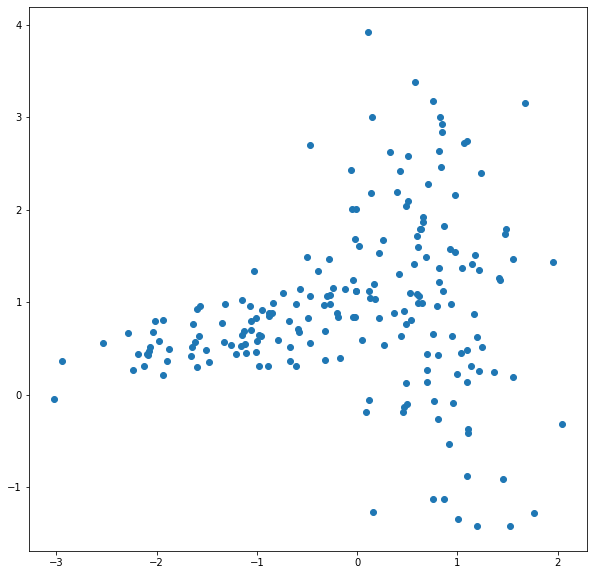

In [97]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)

colors = np.array(['green','orange','grey', 'brown'])
def plot_points(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(Xc_2[:,0], Xc_2[:,1])
    else:
        plt.scatter(Xc_2[:,0], Xc_2[:,1], c= colors[closest_centroids])


plt.figure(figsize=(10,10))
plot_points()

### Init centroids

[[-2 -2]
 [ 1 -2]
 [ 3  1]
 [-1  2]]


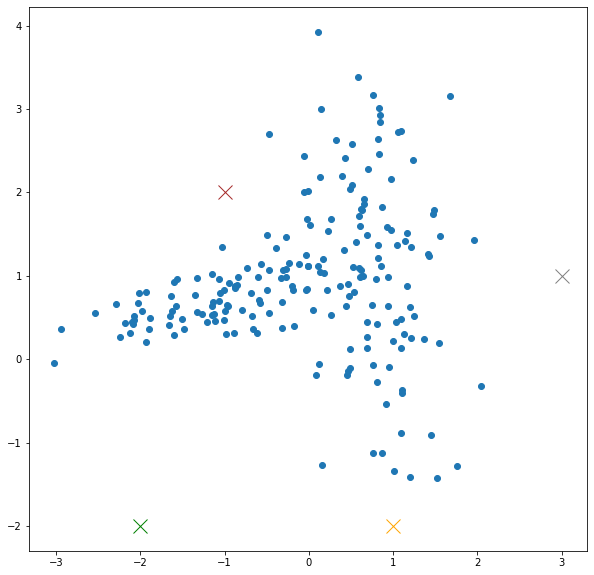

In [98]:
def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed(seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array ([(-2,-2), (1,-2), (3,1), (-1,2) ])
        return centroids[:amount]

centroids = init_centroids(4, is_random= False)
print (centroids)

def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

def draw_state(centroids = None, closest_centroids = None):        
    plt.figure (figsize=(10,10))
    plot_points(closest_centroids)
    plot_centroids(centroids)

draw_state(centroids = centroids, closest_centroids=None)

### Closest centroids

closest_centroids:
 [1 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 2 3 2 3 3 2 1 3 1 3 1 2 3 3 3 3 2 1
 3 3 2 0 3 3 1 3 3 3 3 1 3 1 2 2 3 3 2 3 3 3 3 1 3 1 3 3 3 3 3 3 1 2 3 3 1
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 3 3 3 3 3 2 3 3 3 3 3 3 3 3
 3 3 2 3 3 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 3 1 3 2 3 2 3 3 3 3 3 1 3 3
 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 2 3 1 1 3 3 1 3 3 3 3 3 3 2
 2 3 3 3 3 3 3 3 3 2 3 3 1 3 2]
Cost= 1.6023429324197662


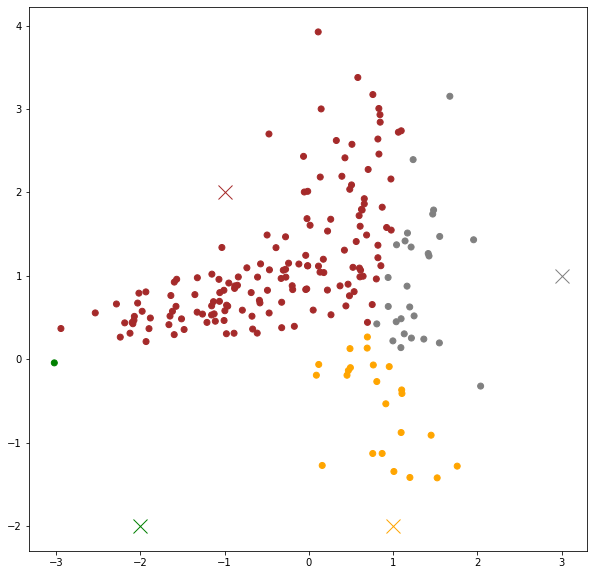

In [99]:
points = np.array(list((zip(Xc_2[:,0], Xc_2[:,1]))))
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)

def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids) #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

### New centroids

New centroids: [array([-3.02042807, -0.04279295]), array([ 0.82513496, -0.55076836]), array([1.28207021, 0.96976219]), array([-0.41078857,  1.15819109])]
Cost= 0.9770359311609034


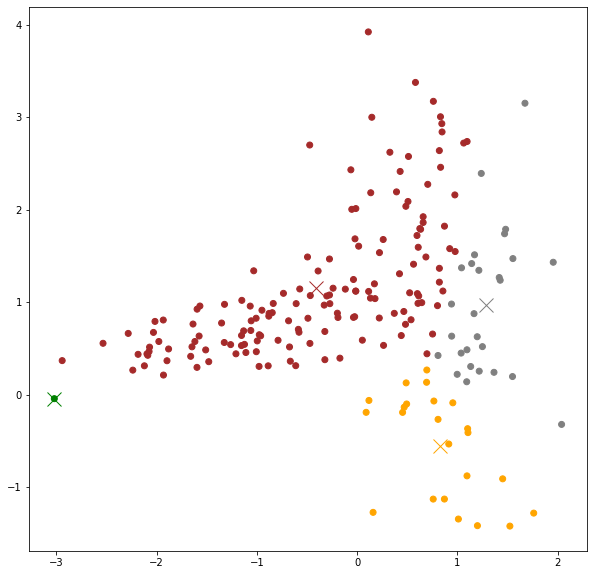

In [100]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

### Random centroid initializations

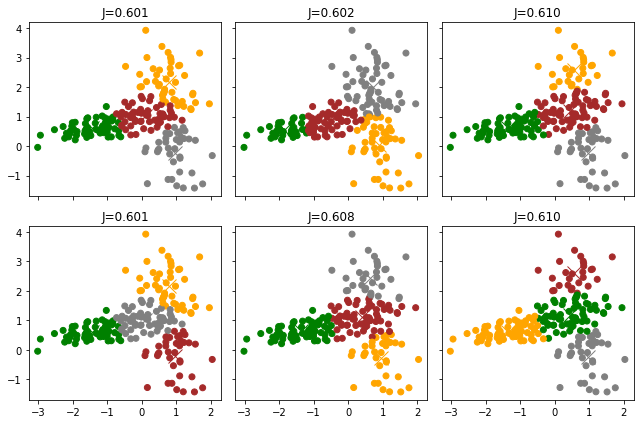

In [102]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist
    
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize= (9,6))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for index_plot in range (6):
    centroids = init_centroids(is_random = True, amount =4, points= points,seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    axes[index_plot].scatter(Xc_2[:,0], Xc_2[:,1], c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        axes[index_plot].plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    plt.sca(axes[index_plot])
    plt.title ('J={:.3f}'.format(J_hist[-1]))

plt.tight_layout()

### Best clustering

Text(0.5, 1.0, 'J=0.600')

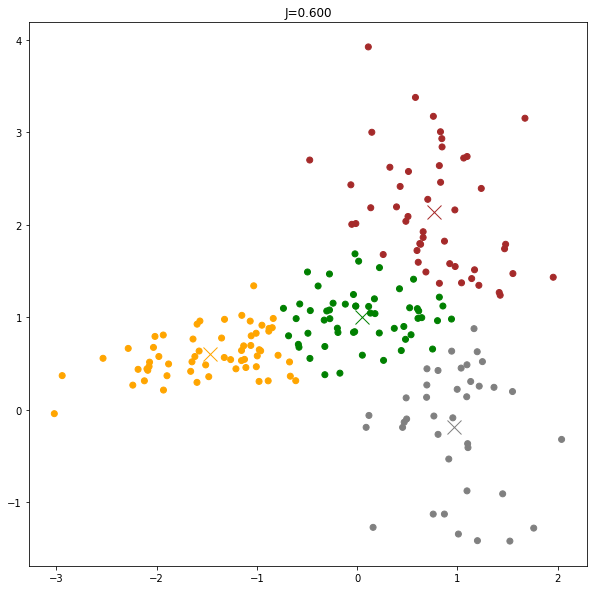

In [104]:
best_result= []

for random_iter in range (100):  
    centroids = init_centroids(amount = 4, points= points, seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    
    if len(best_result)==0 or J_hist[-1] < best_result[2]:
        best_result= [centroids, closest_centroids, J_hist[-1]]

plt.figure(figsize=(10,10))
plt.scatter(Xc_2[:,0], Xc_2[:,1], c= colors[best_result[1]])
for i, c in enumerate (best_result[0]):
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
plt.title ('J={:.3f}'.format(best_result[2]))


# Part 2

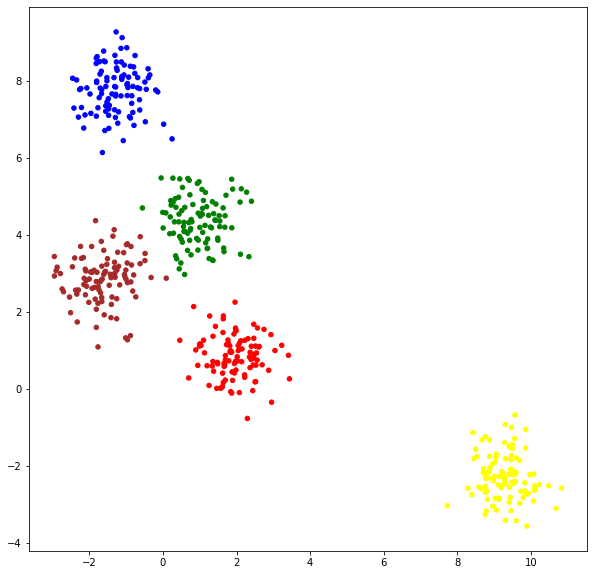

In [118]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)

plt.figure(figsize=(10,10))
colors=  np.array(['green', 'red', 'brown', 'blue', 'yellow'])
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)   

### Complete

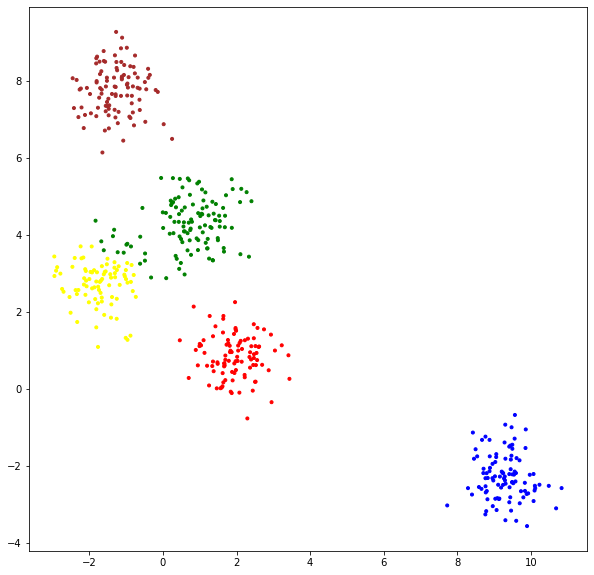

In [119]:
from sklearn.cluster import AgglomerativeClustering

points = np.array(list((zip(X[:,0], X[:,1]))))
clf = AgglomerativeClustering(n_clusters=5, linkage= 'complete')  # single linkage was not available in sklearn 
# available linkage : {“ward”, “complete”, “average”, “single” ! WRONG ! }, optional (default=”ward”)
predicted = clf.fit_predict(points)

plt.figure(figsize=(10,10))
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.') 

### Single

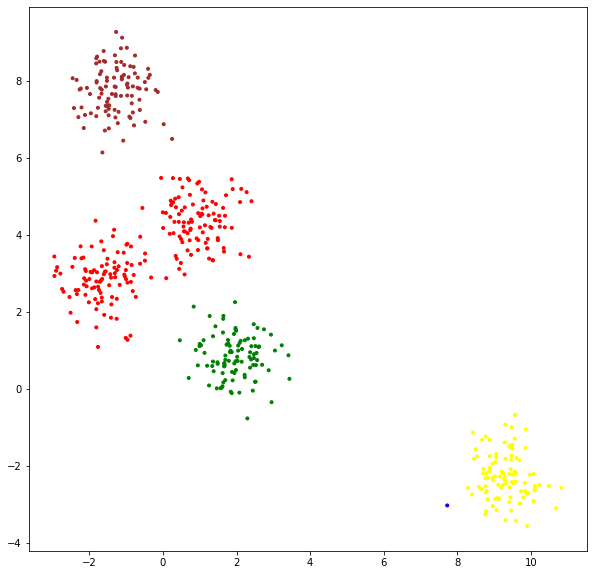

In [120]:
points = np.array(list((zip(X[:,0], X[:,1]))))
clf = AgglomerativeClustering(n_clusters=5, linkage= 'single')  
predicted = clf.fit_predict(points)

plt.figure(figsize=(10,10))
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.') 

### DBSCAN

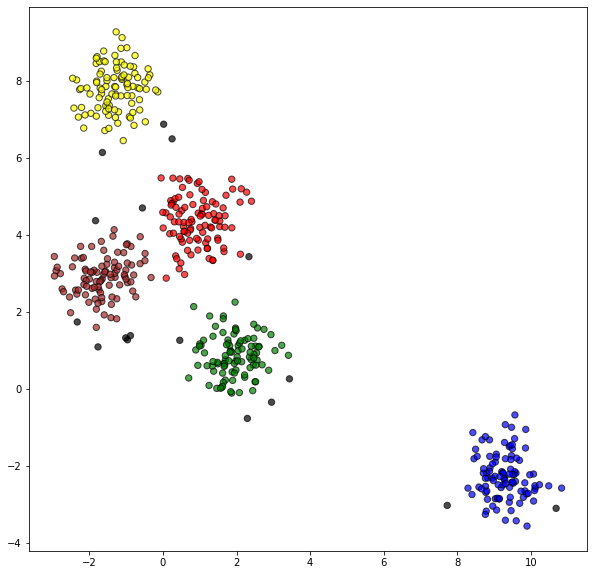

In [121]:
from sklearn.cluster import DBSCAN
def apply_db_scan():
    dbscan = DBSCAN().fit(points)
 
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))-1

    predicted[np.where(predicted == -1)] = n_clusters_and_noice
    return predicted 

predicted  =  apply_db_scan()
plt.figure(figsize=(10,10))
colors= np.r_[colors, np.array(['black']*100)]

plt.scatter(points[:,0], points[:,1], c= colors[predicted], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)    